In [13]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar import var_model

## Dataset: 100 Portfolios by Kenneth French  ##

In [14]:
# 100 portfolios excess returns on 100 portfolios sorted on size and book-to-market
df = pd.read_csv(r"100_Portfolios_10x10.csv")
df.rename(columns = {"Unnamed: 0": "Time"}, inplace=True)
df

C:\Users\shena\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Time,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,...,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7,ME10 BM8,ME10 BM9,BIG HiBM
0,192607,-99.99,12.3656,-99.99,-20.6349,-6.4864,-4.7429,-4.8812,15.7276,-1.6398,...,3.3411,1.182,19.0161,1.4227,1.9459,2.4834,3.1644,0.3378,0.8576,-99.99
1,192608,-99.99,2.9904,-99.99,8,6.7495,-3.5639,-4.1188,-1.6529,-5.3824,...,0.2379,3.9628,8.5675,3.0099,1.1427,3.0263,6.0936,6.0606,11.2245,-99.99
2,192609,-99.99,-18.583,-99.99,-3.7037,-5.0512,-2.1739,-4.5714,-10.61,0.4919,...,-0.392,-1.9836,10.7849,0.8073,-0.9185,1.0889,-0.5436,-0.9524,-1.0703,-99.99
3,192610,-99.99,-4.1369,-99.99,-11.5385,-5.3996,-17.7778,3.5554,-9.2233,-9.1593,...,-4.32,-0.648,-6.6205,-0.5337,-1.5745,-1.9202,-5.3535,-0.9615,-3.9246,-99.99
4,192611,-99.99,-8.2589,-99.99,34.7826,1.2296,0.2027,-4.8789,-3.201,-1.8459,...,6.9978,-0.0541,0.4585,2.9192,1.1447,0.8811,3.6576,3.7217,3.268,-99.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393,202007,0.1071,0.0467,0.2336,0.2217,0.0754,0.1764,0.0633,0.0592,0.0488,...,0.1155,0.0488,0.1478,0.2332,0.2356,0.1679,0.1511,0.0778,0.0392,0.0235
8394,202008,0.0955,0.007,0.2215,0.2197,0.0526,0.1665,0.0589,0.0365,0.0446,...,0.1171,0.0505,0.1491,0.2338,0.2299,0.1734,0.1656,0.0802,0.0395,0.0225
8395,202009,0.1291,0.0475,0.2427,0.2223,0.0864,0.1716,0.063,0.0306,0.0454,...,0.1155,0.0519,0.1532,0.2393,0.2254,0.1692,0.1689,0.0822,0.0397,0.0225
8396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Convert first column to datatime format
df_date = df.copy()
df_date = df_date.dropna()

for date in df_date['Time']:
    date = str(date)+"01"
modified_dates = [str(date) + "01" for date in df_date['Time']]
df_date['Time'] = modified_dates

df_date['Time_length'] = df_date['Time'].map(len)
df_date = df_date[df_date['Time_length'] == 8]

In [16]:
df_date['Time'] = pd.to_datetime(df_date['Time'])
df_date

,Time,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,...,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7,ME10 BM8,ME10 BM9,BIG HiBM,Time_length
0,1926-07-01,-99.99,12.3656,-99.99,-20.6349,-6.4864,-4.7429,-4.8812,15.7276,-1.6398,...,1.182,19.0161,1.4227,1.9459,2.4834,3.1644,0.3378,0.8576,-99.99,8
1,1926-08-01,-99.99,2.9904,-99.99,8,6.7495,-3.5639,-4.1188,-1.6529,-5.3824,...,3.9628,8.5675,3.0099,1.1427,3.0263,6.0936,6.0606,11.2245,-99.99,8
2,1926-09-01,-99.99,-18.583,-99.99,-3.7037,-5.0512,-2.1739,-4.5714,-10.61,0.4919,...,-1.9836,10.7849,0.8073,-0.9185,1.0889,-0.5436,-0.9524,-1.0703,-99.99,8
3,1926-10-01,-99.99,-4.1369,-99.99,-11.5385,-5.3996,-17.7778,3.5554,-9.2233,-9.1593,...,-0.648,-6.6205,-0.5337,-1.5745,-1.9202,-5.3535,-0.9615,-3.9246,-99.99,8
4,1926-11-01,-99.99,-8.2589,-99.99,34.7826,1.2296,0.2027,-4.8789,-3.201,-1.8459,...,-0.0541,0.4585,2.9192,1.1447,0.8811,3.6576,3.7217,3.268,-99.99,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8391,2020-05-01,0.1978,0.1872,0.1159,0.2837,0.1398,0.3236,0.1116,0.069,0.1022,...,0.0062,0.0681,0.0736,0.0399,0.2118,0.0441,0.1296,0.0163,0.0223,8
8392,2020-06-01,0.1457,0.1924,0.1168,0.2992,0.0904,0.3665,0.1075,0.0726,0.09,...,0.0054,0.0694,0.0722,0.0418,0.2056,0.0469,0.1302,0.0159,0.0215,8
8393,2020-07-01,0.1071,0.0467,0.2336,0.2217,0.0754,0.1764,0.0633,0.0592,0.0488,...,0.0488,0.1478,0.2332,0.2356,0.1679,0.1511,0.0778,0.0392,0.0235,8
8394,2020-08-01,0.0955,0.007,0.2215,0.2197,0.0526,0.1665,0.0589,0.0365,0.0446,...,0.0505,0.1491,0.2338,0.2299,0.1734,0.1656,0.0802,0.0395,0.0225,8


In [17]:
df_trim = df_date.loc[(df_date['Time'] >= '1963-1-1') & (df_date['Time'] <= '2015-12-01')]
df_index = df_trim.set_index('Time')
df_index

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7,ME10 BM8,ME10 BM9,BIG HiBM,Time_length
Time,,,,,,,,,,,,,,,,,,,,,
1963-01-01,33.3333,5.4545,-99.99,13.2218,19.481,11.1164,9.1759,11.5506,7.1491,12.0759,...,7.2264,3.3748,4.4681,2.7732,3.2464,6.0737,7.1919,4.9117,2.4814,8
1963-02-01,-11.4583,-3.4483,-99.99,-7.6108,-3.1158,-2.9715,-1.9442,0.1296,2.5768,0.5005,...,-3.0061,-2.1136,-1.8274,-2.9849,-1.1967,-0.9781,-0.9044,2.4468,-3.6289,8
1963-03-01,20,-3.5714,-99.99,-5.5024,-8.9801,1.3264,1.1927,2.0294,2.2637,3.26,...,6.1385,3.6476,2.3225,5.7393,4.7649,1.1233,7.3126,2.789,7.7425,8
1963-04-01,-2.9412,-5.5556,-99.99,0.0149,0.2094,4.4273,3.9997,0.9528,5.1535,2.4682,...,4.4073,5.4306,3.3302,4.6202,6.9689,5.482,3.5622,8.1595,9.0355,8
1963-05-01,8.0808,-3.9216,-99.99,-1.7484,0.1909,2.9433,3.0448,1.9206,7.9897,10.6605,...,4.8527,-0.623,-0.5261,0.6676,1.5461,2.6054,-0.0901,1.9701,4.6387,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,0.2171,0.2081,0.3272,0.1702,0.2432,0.2763,0.1841,0.1455,0.1151,0.0768,...,0.1319,0.0734,0.0456,0.0365,0.0301,0.0397,0.0714,0.0865,-0.0125,8
2015-09-01,0.2024,0.2082,0.3182,0.1757,0.2362,0.2728,0.1841,0.14,0.1147,0.0765,...,0.1327,0.074,0.0481,0.0369,0.0303,0.0358,0.0721,0.0842,-0.0127,8
2015-10-01,0.2074,0.2205,0.2872,0.1746,0.2343,0.2767,0.1703,0.1412,0.1178,0.0805,...,0.1336,0.0728,0.0486,0.0368,0.0294,0.0372,0.072,0.0815,-0.0126,8


In [18]:
from sklearn.preprocessing import StandardScaler
portfolio_standardize = df_trim.loc[:, df_index.columns].values
portfolio_standardized = StandardScaler().fit_transform(portfolio_standardize)
normalized_portfolio = pd.DataFrame(portfolio_standardized
                                    , columns = ['feature'+str(i) for i in range(portfolio_standardized.shape[1])])
normalized_portfolio

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100
0,-0.018314,-0.320294,-2.507635,-0.154476,-0.017649,-0.211183,-0.268123,-0.240408,-0.311974,-0.282042,...,-0.251779,-0.227543,-0.237034,-0.254236,-0.233864,-0.234448,-0.232147,-0.229574,-0.185763,0.0
1,-0.468942,-0.499996,-2.507635,-0.617710,-0.519268,-0.517512,-0.486355,-0.422385,-0.362980,-0.365350,...,-0.252621,-0.227930,-0.237581,-0.254820,-0.234274,-0.235084,-0.232925,-0.229853,-0.186346,0.0
2,-0.152454,-0.502481,-2.507635,-0.570828,-0.649448,-0.424058,-0.424793,-0.392115,-0.366473,-0.345490,...,-0.251869,-0.227523,-0.237220,-0.253935,-0.233724,-0.234894,-0.232135,-0.229814,-0.185262,0.0
3,-0.383255,-0.542532,-2.507635,-0.448145,-0.445453,-0.356631,-0.369706,-0.409269,-0.334236,-0.351188,...,-0.252011,-0.227398,-0.237133,-0.254049,-0.233521,-0.234502,-0.232496,-0.229208,-0.185138,0.0
4,-0.272368,-0.509550,-2.507635,-0.487354,-0.445864,-0.388900,-0.388446,-0.393848,-0.302597,-0.292229,...,-0.251974,-0.227825,-0.237468,-0.254450,-0.234021,-0.234761,-0.232847,-0.229906,-0.185557,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,-0.351481,-0.426192,-0.412382,-0.444692,-0.444703,-0.446891,-0.444587,-0.422132,-0.390441,-0.368399,...,-0.252363,-0.227776,-0.237418,-0.254514,-0.234161,-0.234992,-0.232832,-0.230119,-0.186001,0.0
5072,-0.351629,-0.426190,-0.412570,-0.444570,-0.444858,-0.446967,-0.444587,-0.422219,-0.390446,-0.368401,...,-0.252362,-0.227775,-0.237418,-0.254514,-0.234161,-0.234992,-0.232831,-0.230119,-0.186001,0.0
5073,-0.351579,-0.425942,-0.413217,-0.444594,-0.444900,-0.446882,-0.444858,-0.422200,-0.390411,-0.368373,...,-0.252362,-0.227776,-0.237418,-0.254514,-0.234161,-0.234992,-0.232832,-0.230120,-0.186001,0.0
5074,-0.351468,-0.425611,-0.413587,-0.444394,-0.444936,-0.447083,-0.444432,-0.422183,-0.390497,-0.368396,...,-0.252362,-0.227775,-0.237418,-0.254514,-0.234161,-0.234992,-0.232832,-0.230119,-0.186001,0.0


In [19]:
# First 6 principle components of the aggregate macro data
N = 6
pca_portfolio = PCA(n_components = N)
principalComponents_portfolio = pca_portfolio.fit_transform(normalized_portfolio)
principal_portfolio_df = pd.DataFrame(data = principalComponents_portfolio
             , columns = ['PC'+str(i) for i in range(1, N+1)])
principal_portfolio_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.425529,-1.001250,0.418390,0.147428,-0.229363,0.249847
1,-2.887695,-1.800909,0.668809,-0.045147,-0.044737,0.106286
2,-2.769144,-1.649745,0.496111,-0.006486,-0.098788,0.121323
3,-2.681482,-1.584021,0.617003,0.038808,-0.148435,0.159971
4,-2.703551,-1.541526,0.609599,0.016955,-0.112460,0.145406
...,...,...,...,...,...,...
5071,-2.712381,-1.030229,-0.029739,-0.014646,-0.036416,0.009722
5072,-2.712565,-1.030456,-0.029634,-0.014758,-0.036268,0.009678
5073,-2.712732,-1.030682,-0.029559,-0.014909,-0.036141,0.009630
5074,-2.712859,-1.030640,-0.029603,-0.015079,-0.035963,0.009511


In [20]:
portfolio_explained_variance = pca_portfolio.explained_variance_ratio_
portfolio_explained_variance_df = pd.DataFrame(portfolio_explained_variance, columns = ['Explained Variance'])
portfolio_explained_variance_df.rename(index = lambda x: 'PC'+str(x+1), inplace=True)
portfolio_explained_variance_df

,Explained Variance
PC1,0.889460
PC2,0.084755
PC3,0.004873
PC4,0.004293
PC5,0.002979
PC6,0.002071


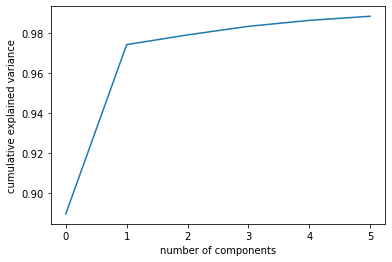

In [21]:
plt.plot(np.cumsum(portfolio_explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');